# **DATASET INFORMATION**

This dataset provides an in-depth look at transaction behavior and financial activity patterns, making it ideal for exploring **fraud detection** and **anomaly identification**. It includes **2,512 transaction data samples**, covering a wide range of transaction attributes, customer demographics, and usage patterns.

Each entry provides comprehensive insights into transaction behavior, enabling analysis for **financial security** and the development of predictive models.

## Key Features

- **`TransactionID`**: A unique alphanumeric identifier for each transaction.  
- **`AccountID`**: Unique ID for each account, can have multiple transactions.  
- **`TransactionAmount`**: Transaction values ​​in currency, ranging from small expenses to large purchases.  
- **`TransactionDate`**: The date and time the transaction occurred.  
- **`TransactionType`**: The transaction type is `'Credit'` or `'Debit'`.  
- **`Location`**: Geographic location of the transaction (name of city in the United States).  
- **`DeviceID`**: The device ID used in the transaction.  
- **`IP Address`**: The IPv4 address used during transactions may change for some accounts.  
- **`MerchantID`**: Unique merchant ID, indicating the primary merchant and transaction anomalies.  
- **`AccountBalance`**: Account balance after the transaction takes place.  
- **`PreviousTransactionDate`**: The last transaction date on the account, useful for calculating transaction frequency.  
- **`Channel`**: Transaction channels such as `Online`, `ATM`, or `Branch`.  
- **`CustomerAge`**: Account owner's age.  
- **`CustomerOccupation`**: User professions such as `Doctor`, `Engineer`, `Student`, or `Retired`.  
- **`TransactionDuration`**: Transaction time (in seconds).  
- **`LoginAttempts`**: Number of login attempts before a transaction—a high number could indicate an anomaly.


# **1. Import Library**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. LOAD DATASET**

In [12]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)

df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [14]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


## **2.1 Exploratory Data Analysis (EDA)**

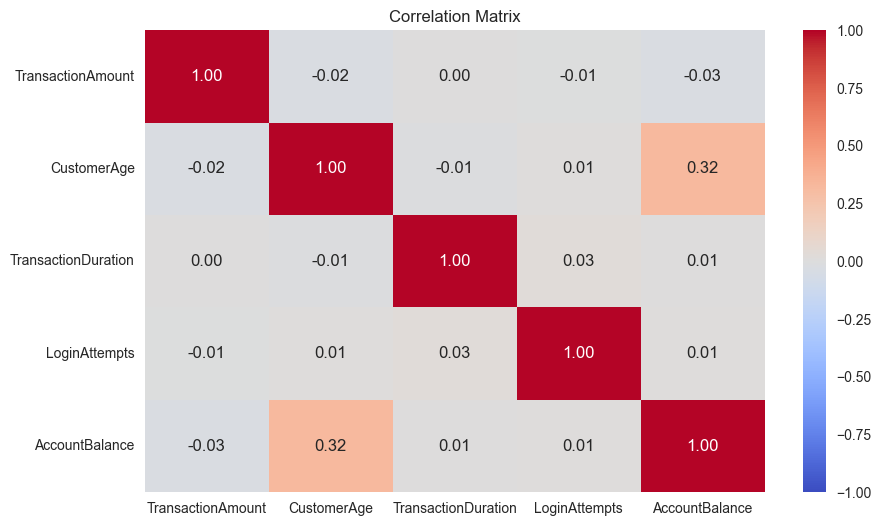

In [15]:
# Shows correlation between numeric features
numerical_cols = df.select_dtypes(include=['number']).columns

correlation = df[numerical_cols].corr()

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation,
               annot=True,
               cmap='coolwarm',
               fmt=".2f",
               vmin=-1,
               vmax=1)
plt.title('Correlation Matrix')
plt.show()

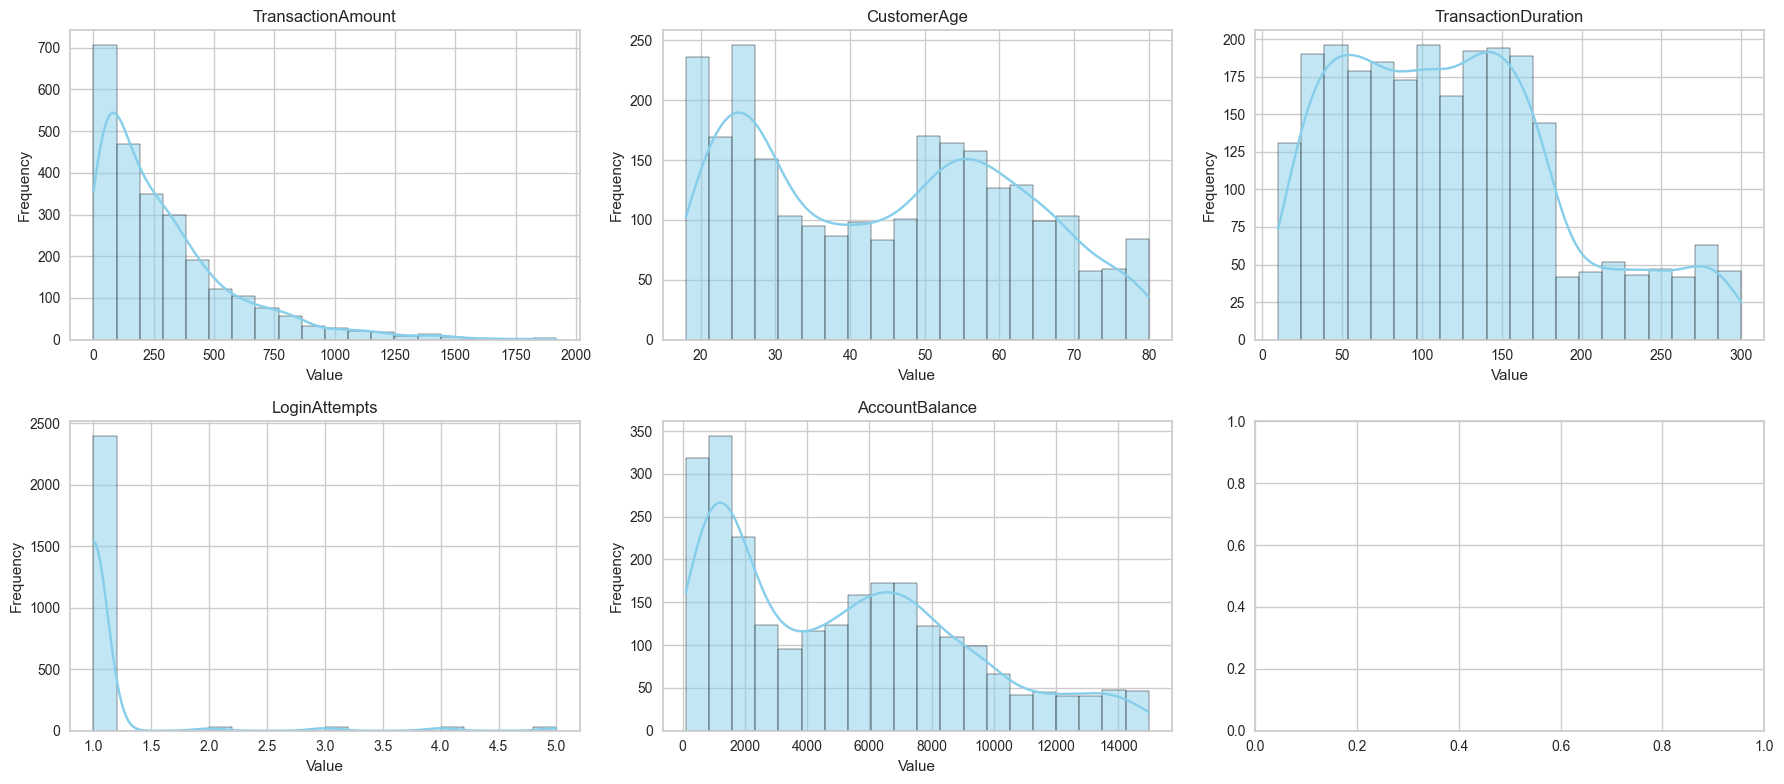

In [16]:
# Displays histograms for all numeric columns

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

for i, column in enumerate(numerical_cols):

    sns.histplot(df[column], bins=20, kde=True, color='skyblue', ax=axes[i])

    # Set title and label
    axes[i].set_title(column)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

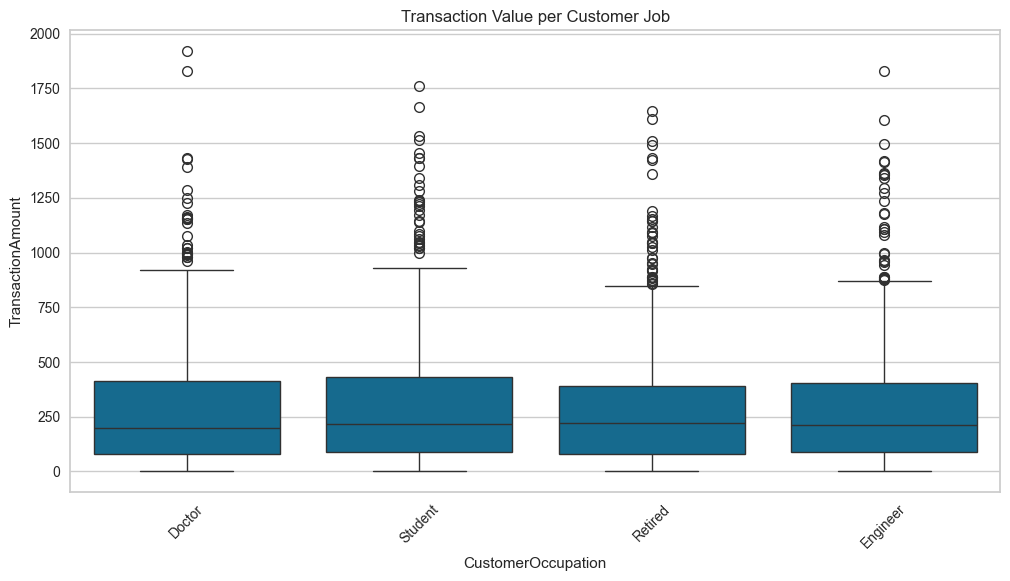

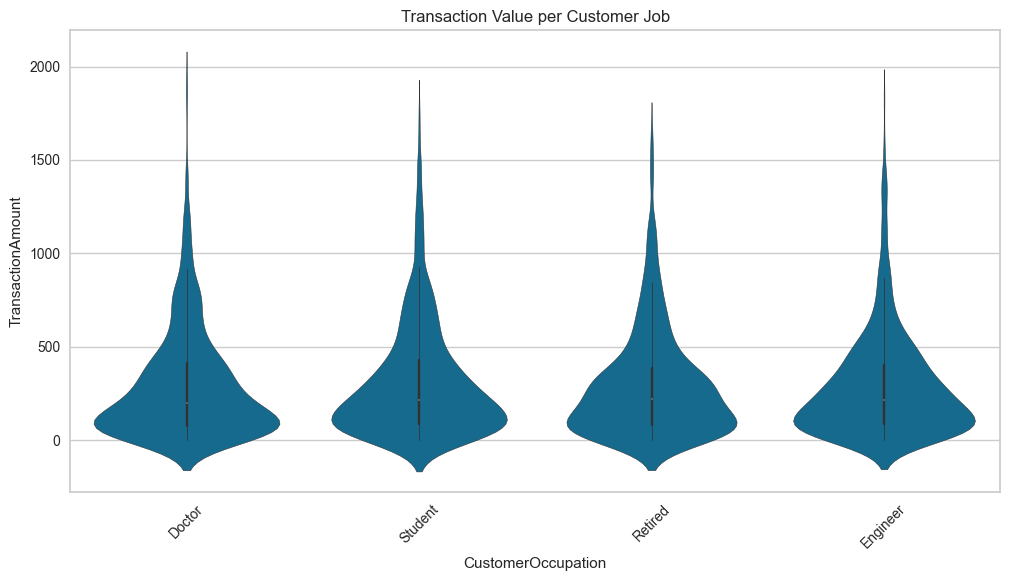

In [17]:
# Boxplot visualization to see the distribution of outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='CustomerOccupation', y='TransactionAmount', data=df)
plt.title("Transaction Value per Customer Job")
plt.xticks(rotation=45) # Putar label sumbu-x agar tidak tumpang tindih
plt.show()

# see the density of data distribution in each category
plt.figure(figsize=(12, 6))
sns.violinplot(x='CustomerOccupation', y='TransactionAmount', data=df)
plt.title("Transaction Value per Customer Job")
plt.xticks(rotation=45)
plt.show()

# **3. Cleaning and Pre-Processing Data**


In [18]:
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64

In [19]:
df.duplicated().sum()

21

In [20]:
df.dropna(inplace=True)

print(df.isnull().sum())

TransactionID              0
AccountID                  0
TransactionAmount          0
PreviousTransactionDate    0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
TransactionDate            0
dtype: int64


In [21]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

In [22]:
cols_to_drop = [col for col in df.columns if
                'id' in col.lower() or
                'ip' in col.lower() or
                'date' in col.lower()]

df = df.drop(columns=cols_to_drop)

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68


In [23]:
# Perform feature encoding using LabelEncoder() for categorical features
categorical_cols = list(df.select_dtypes(include=['object']).columns)

encoders = {}

for column in categorical_cols:
    # Create a LabelEncoder object
    label_encoder = LabelEncoder()

    # Apply (fit) the encoder to the data and transform the data
    df[column] = label_encoder.fit_transform(df[column])

    # Save the encoder
    encoders[column] = label_encoder

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68


In [24]:
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

## Pembersihan dan Pra Pemrosesan Data

In [25]:
# Handle outliers by dropping rows outside the IQR range

for col in numerical_cols:

    # Calculate Quartile 1 (Q1) and Quartile 3 (Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Calculate Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Determine lower bound and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter data to remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.0,1945.000000
mean,256.838278,0.771722,21.299743,0.977378,44.693059,1.503342,119.225193,1.0,5100.811913
std,218.370197,0.419830,12.329250,0.804119,17.743453,1.135888,70.600647,0.0,3907.153333
min,0.260000,0.000000,0.000000,0.000000,18.000000,0.000000,10.000000,1.0,102.200000
25%,78.920000,1.000000,11.000000,0.000000,27.000000,0.000000,63.000000,1.0,1488.650000
50%,199.700000,1.000000,21.000000,1.000000,45.000000,1.000000,111.000000,1.0,4693.600000
75%,374.500000,1.000000,32.000000,2.000000,59.000000,3.000000,162.000000,1.0,7659.990000
max,903.190000,1.000000,42.000000,2.000000,80.000000,3.000000,300.000000,1.0,14977.990000


In [26]:
# Perform feature scaling using StandardScaler() for numeric features
scaler = StandardScaler()

# Apply (fit) scaler to the data and transform the data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-1.111922,1,36,0,1.426636,0,-0.541568,0.0,0.002918
1,0.546926,1,15,0,1.313889,0,0.308502,0.0,2.216531
2,-0.597984,1,23,2,-1.448403,3,-0.895763,0.0,-1.018513
3,-0.331350,1,33,2,-1.053790,3,-1.334965,0.0,0.887895
5,-0.754364,1,28,0,-1.504776,3,0.747704,0.0,-1.105726


## **Binning Data**

In [27]:
# Perform data binning based on value range conditions on numeric features
col_to_bin = 'CustomerAge'

new_col_name = 'AgeGroup'

# Define labels for 3 groups
bin_labels = ['Young', 'Mature', 'Old']
# Use 'pd.qcut' to divide the data into 3 groups
df[new_col_name] = pd.qcut(df[col_to_bin], q=3, labels=bin_labels, duplicates='drop')

# Perform Encoding on the new column to make it numeric
label_encoder = LabelEncoder()
df[new_col_name] = label_encoder.fit_transform(df[new_col_name])

# Save encoder and add the new column name to 'categorical_cols'
encoders[new_col_name] = label_encoder
categorical_cols.extend([new_col_name])

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup
0,-1.111922,1,36,0,1.426636,0,-0.541568,0.0,0.002918,1
1,0.546926,1,15,0,1.313889,0,0.308502,0.0,2.216531,1
2,-0.597984,1,23,2,-1.448403,3,-0.895763,0.0,-1.018513,2
3,-0.331350,1,33,2,-1.053790,3,-1.334965,0.0,0.887895,2
5,-0.754364,1,28,0,-1.504776,3,0.747704,0.0,-1.105726,2


# **4. Building a Clustering Model**

In [28]:
# Make a copy of 'df' to the variable 'df_used'
df_used = df.copy()

df_used.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup
count,1.945000e+03,1945.000000,1945.000000,1945.000000,1.945000e+03,1945.000000,1.945000e+03,1945.0,1.945000e+03,1945.000000
mean,-8.402305e-17,0.771722,21.299743,0.977378,-1.269479e-16,1.503342,2.557223e-17,0.0,-6.027740e-17,1.015424
std,1.000257e+00,0.419830,12.329250,0.804119,1.000257e+00,1.135888,1.000257e+00,0.0,1.000257e+00,0.820123
min,-1.175271e+00,0.000000,0.000000,0.000000,-1.504776e+00,0.000000,-1.547483e+00,0.0,-1.279678e+00,0.000000
25%,-8.149648e-01,1.000000,11.000000,0.000000,-9.974163e-01,0.000000,-7.965883e-01,0.0,-9.247374e-01,0.000000
50%,-2.617251e-01,1.000000,21.000000,1.000000,1.730327e-02,1.000000,-1.165330e-01,0.0,-1.042490e-01,1.000000
75%,5.389562e-01,1.000000,32.000000,2.000000,8.065296e-01,3.000000,6.060257e-01,0.0,6.551666e-01,2.000000
max,2.960651e+00,1.000000,42.000000,2.000000,1.990369e+00,3.000000,2.561185e+00,0.0,2.528623e+00,2.000000


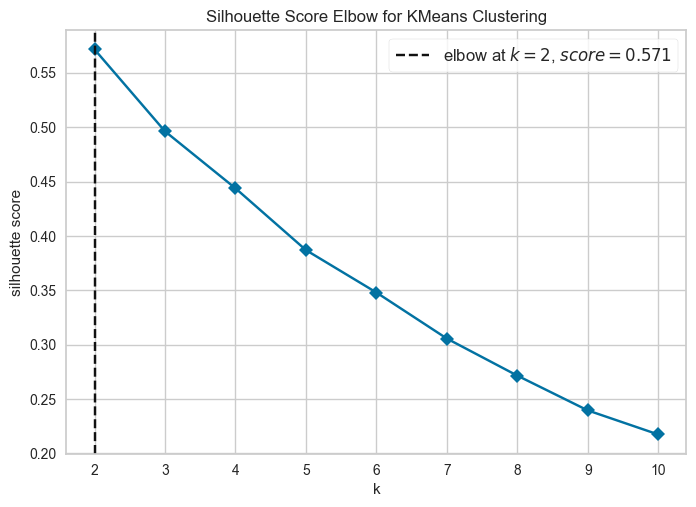

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [29]:
# Visualizing the Elbow Method using KElbowVisualizer()

# Create a clustering model
model = KMeans()

# using KElbowVisualizer to find the optimal number of clusters
visualizer = KElbowVisualizer(model,
                       cluster=(2,10),
                       metric='silhouette',
                       timings=False)

# Run (fit) visualizer on the data
visualizer.fit(df)
# Show the plot
visualizer.show()

In [30]:
# Using the K-Means Clustering algorithm

# Create a KMeans model
model = KMeans(n_clusters=2, random_state=42)

# Fit the model with your data (df)
model.fit(df)

KMeans(n_clusters=2, random_state=42)

Save the Model.

In [ ]:
# Saving models using joblib
# Save the trained clustering model
joblib.dump(model, "model_clustering.h5")

['model_clustering.h5']

In [31]:
# Calculates and displays Silhouette Score values.
labels = model.labels_

score = silhouette_score(df, labels)

print("Silhouette Score:", score)

Silhouette Score: 0.5720739691275379


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


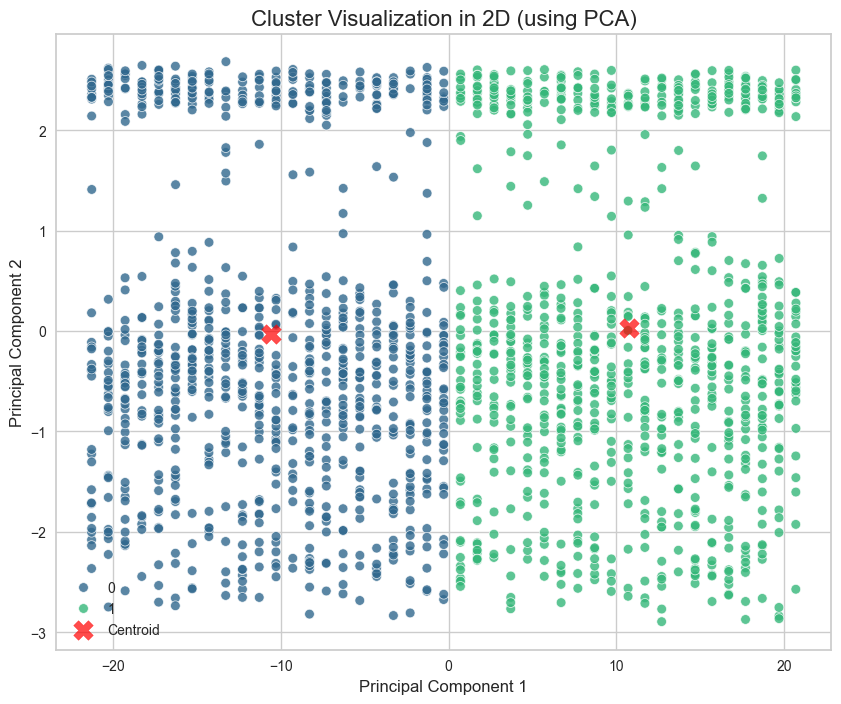

In [33]:
# Creating a visualization of clustering results

# Create PCA objects for the 2 components
pca = PCA(n_components=2)

df_pca = pca.fit_transform(df)

df_pca = pd.DataFrame(data=df_pca, columns=['Principal Component 1', 'Principal Component 2'])

df_pca['Cluster'] = labels

# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Cluster',
    palette=sns.color_palette("viridis", n_colors=2),
    data=df_pca,
    legend="full",
    alpha=0.8
)

plt.title('Cluster Visualization in 2D (using PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
centers = pca.transform(model.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X', label='Centroid')
plt.legend()
plt.show()

In [34]:
# Building a model using PCA.

pca = PCA(n_components=2)

df_pca_array = pca.fit_transform(df_used)

data_final = pd.DataFrame(data=df_pca_array, columns=['PCA1', 'PCA2'])

# Create a NEW KMeans model
kmeans_pca = KMeans(n_clusters=2, random_state=42)

kmeans_pca.fit(data_final)

KMeans(n_clusters=2, random_state=42)

In [ ]:
# Save the PCA model for comparison with the previous clustering model.
joblib.dump(model, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Cluster Interpretation**

### **Interpretation of Clustering Results**

In [35]:
# Displays descriptive analysis of minimum mean, min and max for numeric features..

df_used['Cluster'] = labels

# Group 'df_used' by 'Cluster' and calculate aggregation for 'numerical_cols'.
agg_summary = df_used.groupby('Cluster')[numerical_cols].agg(['mean', 'min', 'max']).round(2).T

display(agg_summary)

Cluster                      0     1
TransactionAmount   mean -0.01  0.01
                    min  -1.17 -1.18
                    max   2.96  2.90
CustomerAge         mean  0.02 -0.02
                    min  -1.50 -1.50
                    max   1.99  1.99
TransactionDuration mean  0.03 -0.03
                    min  -1.55 -1.55
                    max   2.56  2.55
LoginAttempts       mean  0.00  0.00
                    min   0.00  0.00
                    max   0.00  0.00
AccountBalance      mean  0.01 -0.01
                    min  -1.28 -1.28
                    max   2.52  2.53

## Describes the characteristics of each cluster based on its range before **Inverse** (still in **Scaled** condition).
1. **Cluster 1: (Loyal Customers with Medium Balance)**:
    - **Average (mean) TransactionAmount:** 0.01
    - **Average (mean) CustomerAge:** -0.02
    - **Average (mean) AccountBalance:** -0.01
    - **Analysis:** This cluster represents a segment of middle-aged customers who have a fairly strong savings foundation but tend to be more cautious in their daily transactions. This pattern indicates they are passive savers. Therefore, an appropriate recommendation is to cross-sell time deposit products or encourage increased transaction frequency through cashback promotions or merchant discounts..

2. **Cluster 0: (Potential Customers with High Balance)**:
    - **Average (mean) TransactionAmount:** -0.01
    - **Average (mean) CustomerAge:** 0.02
    - **Average (mean) AccountBalance:** 0.01
    - **Analysis:** This cluster is dominated by middle-aged customers who demonstrate an average of regular transaction activity with maintained value. They reflect the profile of loyal and economically stable customers. Therefore, the main strategy for this group is customer retention (maintaining relationships), for example by offering priority services (exclusive membership) or loyalty rewards to maintain customer satisfaction and prevent them from switching to competitors.

# **6. Exporting Data**

In [36]:
# Change the name of the 'Cluster' column to 'Target'
df_used.rename(columns={"Cluster": "Target"}, inplace=True)
df_used.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Target
0,-1.111922,1,36,0,1.426636,0,-0.541568,0.0,0.002918,1,1
1,0.546926,1,15,0,1.313889,0,0.308502,0.0,2.216531,1,0
2,-0.597984,1,23,2,-1.448403,3,-0.895763,0.0,-1.018513,2,1
3,-0.331350,1,33,2,-1.053790,3,-1.334965,0.0,0.887895,2,1
5,-0.754364,1,28,0,-1.504776,3,0.747704,0.0,-1.105726,2,1


In [ ]:
# Save DataFrame 'df_used' to a CSV file named 'data_clustering.csv'
df_used.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [37]:
# inverse dataset to normal range for numerical features
df_inverse = df_used.copy()

# Use 'scaler' to return 'numerical_cols' to its original value.
df_inverse[numerical_cols] = scaler.inverse_transform(df_inverse[numerical_cols])

df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Target
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,1,1
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,1,0
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,2,1
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,2,1
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68,2,1


In [38]:
# inverse the encoded dataset to its original categories.

for column in categorical_cols:
    # Get the correct encoder for 'column' from the dictionary 'encoders'
    encoder = encoders[column]

    # Use the encoder to inverse transform the column
    df_inverse[column] = encoder.inverse_transform(df_inverse[column].astype(int))

df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Old,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Old,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Young,1
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Young,1
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,Young,1


In [39]:
# Perform descriptive analysis of at least mean, min and max for numeric features and mode for categorical features.

# Group 'df_inverse' by 'Target' and calculate aggregation for 'numerical_cols'.
agg_summary_num = df_inverse.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max']).round(2).T

# Group 'df_inverse' by 'Target' and calculate aggregation for 'categorical_cols'.
agg_summary_cat = df_inverse.groupby('Target')[categorical_cols].agg(lambda x: x.mode()[0]).round(2).T

display(agg_summary_num)
display(agg_summary_cat)

Target                           0         1
TransactionAmount   mean    255.55    258.15
                    min       0.32      0.26
                    max     903.19    889.01
CustomerAge         mean     45.06     44.33
                    min      18.00     18.00
                    max      80.00     80.00
TransactionDuration mean    121.12    117.30
                    min      10.00     10.00
                    max     300.00    299.00
LoginAttempts       mean      1.00      1.00
                    min       1.00      1.00
                    max       1.00      1.00
AccountBalance      mean   5142.17   5058.81
                    min     117.98    102.20
                    max   14942.78  14977.99

Target,0,1
TransactionType,Debit,Debit
Location,Charlotte,Tucson
Channel,Branch,Branch
CustomerOccupation,Doctor,Student
AgeGroup,Mature,Young


## Describes the characteristics of each cluster based on its range after **Inverse**.
1. **Cluster 1: (Active Customers of Productive Age)**:
    - **Average (mean) TransactionAmount:** 258.15
    - **Average (mean) CustomerAge:** 44.33
    - **Average (mean) AccountBalance:** 5058.81
    - **Analysis:** This group consists of productive-age (middle-class) customers who frequently make transactions (high value) with moderate balances. This profile demonstrates a dynamic lifestyle and smooth cash flow. **Recommendation:** Offer easy payment features, credit cards, or reward points.

2. **Cluster 0: (Productive Age Savings Customers)**:
    - **Average (mean) TransactionAmount:** 255.55
    - **Average (mean) CustomerAge:** 45.06
    - **Average (mean) AccountBalance:** 5142.17
    - **Analysis:** This group is slightly older and has the highest savings balances, but their daily transactions are the lowest. This indicates they are the type of savers who are cautious about spending their money. **Recommendation:** Offer deposit products, term deposits, or low-risk investments to optimize their idle funds.

In [40]:
# Double check the data that has been inverted.
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Old,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Old,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Young,1
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Young,1
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,Young,1


In [41]:
# Save Inverse Data
df_inverse.to_csv('data_clustering_inverse.csv', index=False)